In [74]:
%matplotlib inline
import pandas
import matplotlib.pyplot
trains = pandas.read_csv('data/sydtrains.csv', index_col=1, thousands=',')

In [75]:
#trains2014 = trains[trains.YEAR == 2014]
trains2014 = trains[trains.YEAR == 2014].copy()

In [76]:
trains2014

LINE  YEAR SURVEY_DATE_USED  \
STATION                                                                        
Central                                           CBD  2014        6/05/2014   
Town Hall                                         CBD  2014        7/05/2014   
Wynyard                                           CBD  2014       20/05/2014   
Parramatta                                    Western  2014       19/11/2014   
North Sydney                              North Shore  2014       19/08/2014   
Redfern                                           CBD  2014        1/05/2014   
Chatswood                                 North Shore  2014       19/08/2014   
Bondi Junction                        Eastern Suburbs  2014        2/09/2014   
Strathfield                                Inner West  2014        9/09/2014   
Circular Quay                                     CBD  2014       22/05/2014   
Martin Place                                      CBD  2014       27/05/2014   
Hurstville                                  Illawarra  2014       28/05/2014   
St Leonards                               North Shore  2014       27/05/2014   
Blacktown                                     Western  2014       14/10/2014   
Burwood                                    Inner West  2014        9/09/2014   
Kings Cross                           Eastern Suburbs  2014        3/09/2013   
Hornsby                                   North Shore  2014       14/05/2014   
Ashfield                                   Inner West  2014        4/09/2013   
Kogarah                                     Illawarra  2014       19/06/2014   
Lidcombe                                        South  2014        5/06/2014   
Auburn                                        Western  2014       19/11/2014   
Museum                                            CBD  2014       22/05/2014   
Epping                       Northern via Strathfield  2014       21/05/2014   
Macquarie University      Northern via Macquarie Park  2014       21/05/2014   
St James                                          CBD  2014       27/05/2014   
Rockdale                                    Illawarra  2014       28/05/2014   
Cabramatta                                      South  2014       11/06/2014   
Bankstown                                   Bankstown  2014       13/05/2014   
Liverpool                                       South  2014        4/06/2014   
Sutherland                                  Illawarra  2014       12/06/2014   
...                                               ...   ...              ...   
Menangle Park                      Southern Highlands  2014       19/06/2014   
Port Kembla North                         South Coast  2014       18/09/2014   
Scone                                          Hunter  2014        3/06/2009   
Tarro                                          Hunter  2014        3/06/2009   
Aberdeen                                       Hunter  2014        3/06/2009   
Bombo                                     South Coast  2014       18/09/2014   
Branxton                                       Hunter  2014        3/06/2009   
Burradoo                           Southern Highlands  2014       25/05/2010   
Coalcliff                                 South Coast  2014        9/08/2012   
Dunmore (Shellharbour)                    South Coast  2014       18/06/2014   
Exeter                             Southern Highlands  2014       25/05/2010   
Greta                                          Hunter  2014        3/06/2009   
Linden                                 Blue Mountains  2014       19/08/2014   
Marulan                            Southern Highlands  2014       17/06/2014   
Menangle                           Southern Highlands  2014       17/06/2014   
Paterson                                       Hunter  2014        3/06/2009   
Scarborough                               South Coast  2014       22/08/2013   
Tallong                            Southern Highl

In [77]:
interesting_columns = trains2014[['IN_0600_0930', 'OUT_0600_0930']]

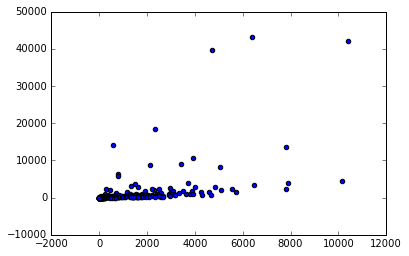

In [78]:
matplotlib.pyplot.scatter(interesting_columns.IN_0600_0930,interesting_columns.OUT_0600_0930)

In [79]:
interesting_columns[interesting_columns.IN_0600_0930 > 9000]

IN_0600_0930  OUT_0600_0930
STATION                                    
Central                10390          42070
Bondi Junction         10150           4350

In [80]:
import sklearn.cluster

In [81]:
kmeans_clusterer = sklearn.cluster.KMeans(init='k-means++', n_clusters=2)

In [82]:
two_clustering = kmeans_clusterer.fit_predict(interesting_columns)

In [83]:
import numpy

In [84]:
rainbow = numpy.array(['red','green','blue','orange','purple','teal','magenta','cyan'])

In [85]:
rainbow[two_clustering]

array(['green', 'green', 'green', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red',
       'red', 

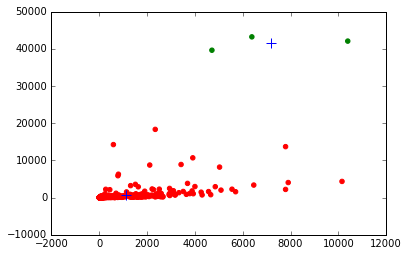

In [86]:
matplotlib.pyplot.scatter(interesting_columns.IN_0600_0930,
                          interesting_columns.OUT_0600_0930,
                          color=rainbow[two_clustering]
                         )
matplotlib.pyplot.scatter(kmeans_clusterer.cluster_centers_[:,0],
                          kmeans_clusterer.cluster_centers_[:,1],
                          marker='+',
                          s=120
                         )

In [87]:
two_clustering_clusters_centres = kmeans_clusterer.cluster_centers_

In [88]:
two_clustering_clusters_centres

array([[  1117.40983607,    732.03278689],
       [  7160.        ,  41633.33333333]])

In [89]:
cluster_centers = {}
cluster_membership = {}
for cluster_count in range(3,15):
    km = sklearn.cluster.KMeans(init='k-means++',
                                n_clusters=cluster_count
                               )
    cluster_membership[cluster_count] = km.fit_predict(interesting_columns)
    cluster_centers[cluster_count] =  km.cluster_centers_

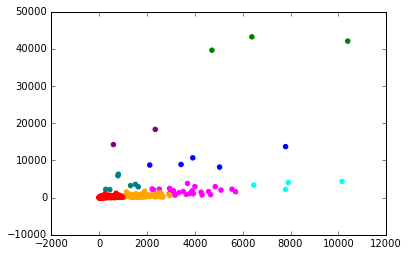

In [90]:
matplotlib.pyplot.scatter(interesting_columns.IN_0600_0930,
                          interesting_columns.OUT_0600_0930,
                          color=rainbow[cluster_membership[8]]
                         )

In [91]:
trains2014['eight_cluster_membership'] = rainbow[cluster_membership[8]]

In [92]:
trains2014

LINE  YEAR SURVEY_DATE_USED  \
STATION                                                                        
Central                                           CBD  2014        6/05/2014   
Town Hall                                         CBD  2014        7/05/2014   
Wynyard                                           CBD  2014       20/05/2014   
Parramatta                                    Western  2014       19/11/2014   
North Sydney                              North Shore  2014       19/08/2014   
Redfern                                           CBD  2014        1/05/2014   
Chatswood                                 North Shore  2014       19/08/2014   
Bondi Junction                        Eastern Suburbs  2014        2/09/2014   
Strathfield                                Inner West  2014        9/09/2014   
Circular Quay                                     CBD  2014       22/05/2014   
Martin Place                                      CBD  2014       27/05/2014   
Hurstville                                  Illawarra  2014       28/05/2014   
St Leonards                               North Shore  2014       27/05/2014   
Blacktown                                     Western  2014       14/10/2014   
Burwood                                    Inner West  2014        9/09/2014   
Kings Cross                           Eastern Suburbs  2014        3/09/2013   
Hornsby                                   North Shore  2014       14/05/2014   
Ashfield                                   Inner West  2014        4/09/2013   
Kogarah                                     Illawarra  2014       19/06/2014   
Lidcombe                                        South  2014        5/06/2014   
Auburn                                        Western  2014       19/11/2014   
Museum                                            CBD  2014       22/05/2014   
Epping                       Northern via Strathfield  2014       21/05/2014   
Macquarie University      Northern via Macquarie Park  2014       21/05/2014   
St James                                          CBD  2014       27/05/2014   
Rockdale                                    Illawarra  2014       28/05/2014   
Cabramatta                                      South  2014       11/06/2014   
Bankstown                                   Bankstown  2014       13/05/2014   
Liverpool                                       South  2014        4/06/2014   
Sutherland                                  Illawarra  2014       12/06/2014   
...                                               ...   ...              ...   
Menangle Park                      Southern Highlands  2014       19/06/2014   
Port Kembla North                         South Coast  2014       18/09/2014   
Scone                                          Hunter  2014        3/06/2009   
Tarro                                          Hunter  2014        3/06/2009   
Aberdeen                                       Hunter  2014        3/06/2009   
Bombo                                     South Coast  2014       18/09/2014   
Branxton                                       Hunter  2014        3/06/2009   
Burradoo                           Southern Highlands  2014       25/05/2010   
Coalcliff                                 South Coast  2014        9/08/2012   
Dunmore (Shellharbour)                    South Coast  2014       18/06/2014   
Exeter                             Southern Highlands  2014       25/05/2010   
Greta                                          Hunter  2014        3/06/2009   
Linden                                 Blue Mountains  2014       19/08/2014   
Marulan                            Southern Highlands  2014       17/06/2014   
Menangle                           Southern Highlands  2014       17/06/2014   
Paterson                                       Hunter  2014        3/06/2009   
Scarborough                               South Coast  2014       22/08/2013   
Tallong                            Southern Highl

In [93]:
import sklearn.metrics

In [94]:
two_cluster_silhouette_score = sklearn.metrics.silhouette_score(interesting_columns,two_clustering)

In [95]:
two_cluster_silhouette_score

0.9457809055255304

In [96]:
s = {}
for cluster_count in range(3,15):
    s[cluster_count] = sklearn.metrics.silhouette_score(interesting_columns,
                                         cluster_membership[cluster_count]
                                        )
    print cluster_count, s[cluster_count]

3 0.824303583537
4 0.665944102122
5 0.608947260052
6 0.622049677055
7 0.615073209848
8 0.633028199093
9 0.613421845211
10 0.643475559859
11 0.601864522285
12 0.605491006632
13 0.565213110101
14 0.568970384843


In [97]:
s[2] = two_cluster_silhouette_score

In [98]:
s

{2: 0.9457809055255304,
 3: 0.8243035835371455,
 4: 0.6659441021223258,
 5: 0.60894726005162669,
 6: 0.62204967705516945,
 7: 0.61507320984750591,
 8: 0.63302819909321706,
 9: 0.61342184521086573,
 10: 0.6434755598589772,
 11: 0.60186452228548459,
 12: 0.60549100663217148,
 13: 0.56521311010087583,
 14: 0.56897038484343598}

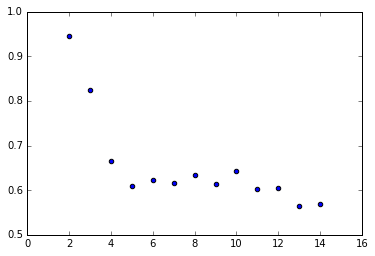

In [99]:
matplotlib.pyplot.scatter(s.keys(), s.values())